In [50]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Iris의 세 가지 품종, 분류해볼 수 있겠어요? [프로젝트]

In [1]:
import sklearn

print(sklearn.__version__)

1.0


루브릭
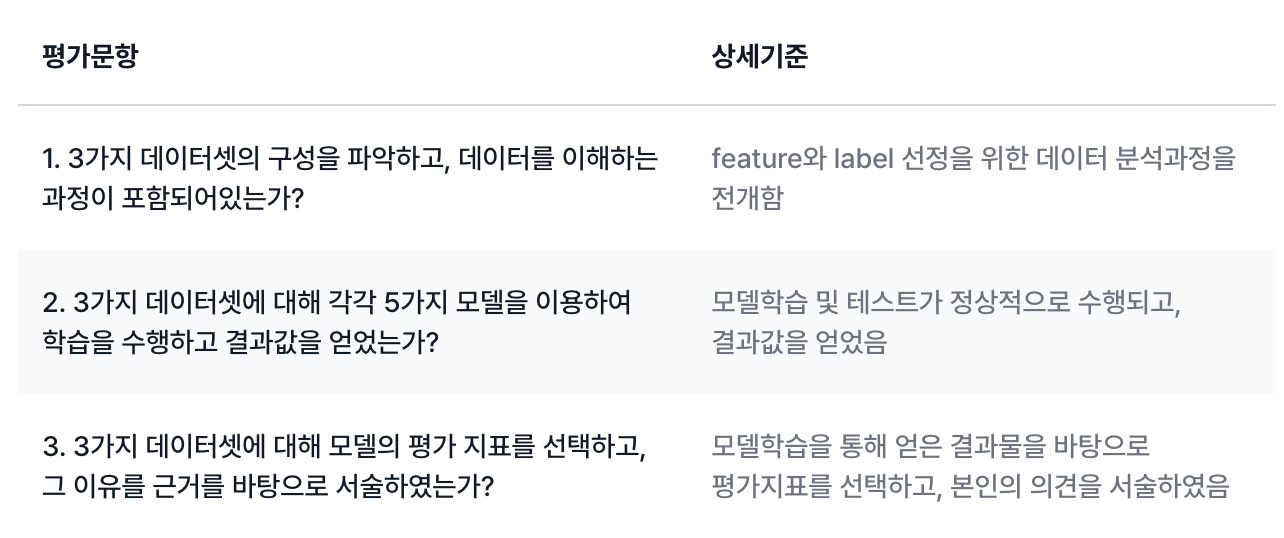

## 0. 붓꽃
- iris data 분류

In [69]:
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [70]:
iris_data = iris.data

print(iris_data.shape) 

(150, 4)


In [71]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [72]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [74]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [75]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [76]:
import pandas as pd
type(iris_data)
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [77]:
iris_df["label"] = iris.target

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


In [79]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [80]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

In [81]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
print(decision_tree._estimator_type)

classifier


In [82]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

## 1. 손글씨 분류
- load_digits : 손글씨를 분류해 봅시다

In [53]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report 

digits = load_digits()
digits_data = digits.data
digits_label = digits.target

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=42) 


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test) 

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.87        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



In [2]:
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [3]:
# svm
from sklearn import svm 
svm_model = svm.SVC()

print(svm_model._estimator_type) 

classifier


In [4]:
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [5]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier() 

print(sgd_model._estimator_type) 

classifier


In [6]:
sgd_model.fit(X_train, y_train)
pred = sgd_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.92      0.96      0.94        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.93      0.87      0.90        30
           9       0.97      0.93      0.95        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [7]:
# logistic Regression
from sklearn.linear_model import LogisticRegression 
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [12]:
logistic_model.fit(X_train, y_train)
pred = logistic_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [15]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss',
                      booster = 'gbtree',
                      objective = 'binary:logistic',
                      max_depth = 5,
                      learning_rate = 0.05,
                      n_estimators = 500,
                      subsample = 1, 
                      colsample_bytree = 1,
                      n_jobs = -1)                      

In [17]:
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      0.98      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      0.94      0.96        35
           7       0.97      0.97      0.97        34
           8       0.91      0.97      0.94        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [18]:
pred = xgb.predict(X_test) # 테스트 데이터셋에 대한 예측 값 xgb
y_pred = decision_tree.predict(X_test) # DecisionTreeClassifier

In [63]:
digits.target_names.shape[0]

10

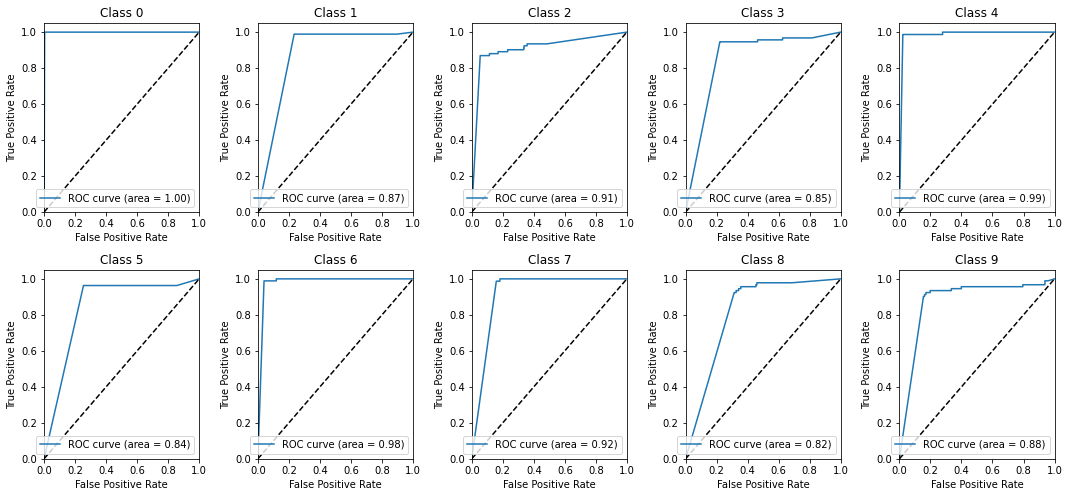

Overall roc_auc_score:  0.9057720902971097


In [106]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load data
digits = load_digits()
X = digits.data
y = digits.target
n_classes = len(digits.target_names)

# Binarize the output
y = label_binarize(y, classes=range(n_classes))
n_samples, n_features = X.shape

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

# classifier
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 10))
for i in range(n_classes):
    plt.subplot(3, 5, i+1)  # Adjust the subplot layout here based on the number of classes
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Class {i}')
    plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Calculate the overall ROC AUC score
roc_auc_score = roc_auc_score(y_test, y_score, multi_class='ovr')
print("Overall roc_auc_score: ", roc_auc_score)

In [68]:
for idx, i in enumerate(range(n_classes)):
    print(i, 111+idx)

0 111
1 112
2 113
3 114
4 115
5 116
6 117
7 118
8 119
9 120


### 1.2 손글씨 분류 모델 F1 스코어 및 해석

- 의사결정 나무: 0.84
  - 기본적인 모델로, 비교적 낮은 성능을 보임. 복잡한 패턴 인식에는 한계가 있을 수 있음.

- 랜덤포레스트: 0.98
  - 앙상블 기법을 사용해 의사결정 나무의 성능을 크게 향상시킴. 높은 정확도와 일반화 성능을 보임.

- SVM (Support Vector Machine): 0.99
  - 가장 높은 F1 스코어를 달성. 고차원 데이터에서의 복잡한 분류 문제에 강력한 성능을 보임.

- SGD (Stochastic Gradient Descent): 0.96
  - 높은 성능을 보이나 SVM에 비해 약간 낮은 성능. 대규모 데이터셋에 적합한 학습 효율성을 가짐.

- 로지스틱 회귀: 0.97
  - 선형 분류 문제에 강력하지만, 복잡한 손글씨 분류에서는 SVM이나 랜덤포레스트에 비해 약간 낮은 성능을 보임.

- XGB (XGBoost): 0.97
  - 높은 성능과 함께 모델의 학습 속도와 예측 성능에서 우수함. 과적합 방지 기능으로 높은 일반화 가능성을 제공함.

- SVM은 복잡한 이미지 분류 문제에서 뛰어난 성능
- 랜덤포레스트와 XGBoost와 같은 앙상블 기법이 높은 정확도와 일반화 성능을 제공한다는 것을 확인할 수 있음

## 2. 와인분류
- load_wine : 와인을 분류해 봅시다

In [25]:
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report 

wine = load_wine()
wine_data = wine.data
wine_label = wine.target

In [83]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=42) 


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [84]:
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [86]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

In [28]:
# svm
from sklearn import svm 
svm_model = svm.SVC()

print(svm_model._estimator_type) 

classifier


In [29]:
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



In [30]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier() 

print(sgd_model._estimator_type) 

classifier


In [31]:
sgd_model.fit(X_train, y_train)
pred = sgd_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.73      0.79      0.76        14
           2       1.00      0.12      0.22         8

    accuracy                           0.72        36
   macro avg       0.81      0.64      0.60        36
weighted avg       0.78      0.72      0.66        36



In [32]:
# logistic Regression
from sklearn.linear_model import LogisticRegression 
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [33]:
logistic_model.fit(X_train, y_train)
pred = logistic_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss',
                      booster = 'gbtree',
                      objective = 'binary:logistic',
                      max_depth = 5,
                      learning_rate = 0.05,
                      n_estimators = 500,
                      subsample = 1, 
                      colsample_bytree = 1,
                      n_jobs = -1)                      

In [35]:
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



의사결정나무 0.94 랜덤포레스트 1.00 sgb 0.97 svm 0.81 sgd 0.72 logistic 0.97

- F1 스코어 선택 이유

    - F1 스코어는 정밀도와 재현율의 조화 평균을 나타내며, 두 지표를 모두 고려하여 모델의 성능을 평가한다.
    - 불균형 데이터셋에서 한 클래스의 예측 성능이 중요할 때 유용한 지표이다. 
    - 손글씨, 와인 분류와 같은 경우, 모든 클래스를 공정하게 예측하는 것이 중요하기 때문에 F1 스코어를 선택했다.
    - F1 스코어는 높은 정밀도와 재현율을 동시에 달성해야만 높아지므로, 모델이 클래스 간 불균형을 잘 처리하고 있음을 보여주는 지표로 활용할 수 있다.

### 1.2 손글씨 분류 모델 F1 스코어 및 해석

- 의사결정 나무: 0.94
  - 높은 성능을 보이나, 완벽하지는 않음. 결정 경계가 단순한 형태로 이루어져 있을 가능성이 있음.

- 랜덤포레스트: 1.00
  - 모든 데이터를 정확하게 분류. 앙상블 기법이 복잡한 결정 경계를 잘 포착하여 뛰어난 일반화 성능을 보임.
  - 실제 confusion_matrix 확인해보니 완벽하게 분류...
  - 이런 완벽한 성능은 특히 작은 데이터셋이나 매우 구별되는 특성을 가진 데이터셋에서 나타날 수 있다
    - 과적합 가능성 염두
    - 모델이 새로운, 보지 못한 데이터에 대해서도 잘 일반화할 수 있는지 확인하는 것이 중요할 것

- SGD (Stochastic Gradient Descent): 0.97
  - 높은 성능을 나타내지만, 랜덤포레스트에 비해 소폭 낮음. 대규모 데이터셋에 적합한 학습 효율.

- SVM (Support Vector Machine): 0.81
  - 비교적 낮은 성능. 와인 데이터의 특성과 분포가 SVM의 기본 가정과 잘 맞지 않을 수 있음.

- SGD: 0.72
  - 가장 낮은 성능. 학습률 조정이나 규제 강도 조정이 필요할 수 있음.

- 로지스틱 회귀: 0.97
  - 높은 성능을 보이며, 선형 결정 경계가 데이터를 잘 분류함을 나타냄.

## 3. 유방암 여부 진단
- load_breast_cancer : 유방암 여부를 진단해 봅시다

In [88]:
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report 

breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

In [89]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=42) 


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [38]:
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [39]:
# svm
from sklearn import svm 
svm_model = svm.SVC()

print(svm_model._estimator_type) 

classifier


In [40]:
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [41]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier() 

print(sgd_model._estimator_type) 

classifier


In [42]:
sgd_model.fit(X_train, y_train)
pred = sgd_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [43]:
# logistic Regression
from sklearn.linear_model import LogisticRegression 
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [44]:
logistic_model.fit(X_train, y_train)
pred = logistic_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [90]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss',
                      booster = 'gbtree',
                      objective = 'binary:logistic',
                      max_depth = 5,
                      learning_rate = 0.05,
                      n_estimators = 500,
                      subsample = 1, 
                      colsample_bytree = 1,
                      n_jobs = -1)                      

In [91]:
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [47]:
pred = xgb.predict(X_test) # 테스트 데이터셋에 대한 예측 값 xgb
y_pred = decision_tree.predict(X_test) # DecisionTreeClassifier

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred) # input 순서 : 실제 라벨, 예측 값
acu_score = roc_auc_score(y_test, pred)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred) # input 순서 : 실제 라벨, 예측 값
acu_score2 = roc_auc_score(y_test, y_pred)

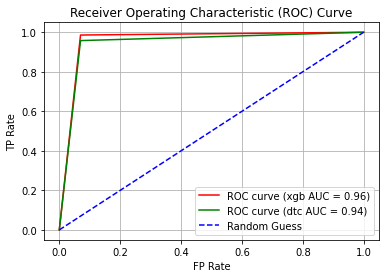

In [51]:
plt.plot(fpr, tpr, color = 'red', label = f'ROC curve (xgb AUC = {acu_score:.2f})')

plt.plot(fpr2, tpr2, color = 'green', label = f'ROC curve (dtc AUC = {acu_score2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'blue', label = 'Random Guess') # y = x 직선 표시


plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()
plt.grid(True)

plt.show()

In [108]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer

# 데이터 로드
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 기본 모델 학습 및 평가
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 3.1 유방암 진단 모델 성능 해석

- 의사결정 나무 (Decision Tree): 재현율 0.94, F1 스코어 0.95
- 랜덤포레스트 (Random Forest): 재현율 0.96, F1 스코어 0.96
- SVM (Support Vector Machine): 재현율 0.93, F1 스코어 0.95
- SGD (Stochastic Gradient Descent): 재현율 0.93, F1 스코어 0.95
- 로지스틱 회귀 (Logistic Regression): 재현율 0.96, F1 스코어 0.96
- XGB (XGBoost): 재현율 0.96, F1 스코어 0.96

유방암 진단에서는 재현율이 매우 중요하다
- 암 진단에서 양성을 놓치는 것(false negative)은 매우 심각한 결과를 초래할 수 있기 때문
- 랜덤포레스트, 로지스틱 회귀, XGBoost 모델 : 가장 높은 재현율, F1 스코어 
     - 해당 모델이 실제 양성 케이스를 잘 잡아내고 있으며, 예측 정확성이 높다

## 4. 프로젝트 회고
1. 배운점
    - 손글씨 분류 모델 (load_digits) : SVM과 SGD의 성능 차이에서 알고리즘 선택의 중요성
    - 와인 분류 모델 (load_wine)
        - 완벽한 성능(1.0)이 나올 수 있으나, 과적합의 가능성을 항상 염두에 둬야 함
        - 데이터셋의 크기가 작을 경우, 모델의 일반화 능력을 정확히 평가하기 어려울 수 있음
        - 특정 데이터셋에 대해 여러 모델을 실험하여 최적의 모델을 찾는 과정의 중요성

    - 유방암 진단 모델 (load_breast_cancer)
        - 다양한 모델을 통한 성능 비교가 중요하며, 특히 의료 데이터에서는 성능뿐만 아니라 모델의 해석 가능성도 중요
        - 의료 분야에서는 재현율이 매우 중요한 평가 지표임

2. 아쉬운 점 + 추가계획
    - 앙상블 기법과 하이퍼파라미터 최적화를 통한 모델 성능 개선
    - 데이터셋을 확장하거나 보강하여 모델의 학습 능력 향상
    - 교차 검증과 같은 방법을 활용하여 모델의 일반화 능력을 더 정확히 평가.
- 실제 의료 현장에서의 적용 가능성을 고려한 모델 개발과 평가해보고 싶다